# Project 6 - Online News Popularity - Unsupervised & Supervised Learning

In [384]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import and Describe the Dataset

In [385]:
df=pd.read_csv('/Users/archanavillalba/Data/Project6/OnlineNewsPopularity/OnlineNewsPopularity.csv')

In [386]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

In [388]:
df[' title_subjectivity'].value_counts()

0.000000    18013
0.500000     2642
1.000000     2527
0.400000     1338
0.454545     1148
            ...  
0.365801        1
0.432386        1
0.570833        1
0.441558        1
0.682273        1
Name:  title_subjectivity, Length: 673, dtype: int64

In [389]:
df[' abs_title_subjectivity'].value_counts()

0.500000    20539
0.000000     2643
0.100000     1965
0.200000     1484
0.400000     1401
            ...  
0.074603        1
0.036508        1
0.164773        1
0.048889        1
0.135152        1
Name:  abs_title_subjectivity, Length: 532, dtype: int64

In [390]:
df1=df.drop([' timedelta',' n_non_stop_words',' n_non_stop_unique_tokens',' kw_min_min',' kw_max_min',' kw_avg_min',' kw_min_max',' kw_max_max',' kw_avg_max',' kw_min_avg',' kw_max_avg',' kw_avg_avg',' self_reference_min_shares',' self_reference_max_shares',' self_reference_avg_sharess',' LDA_00',' LDA_01',' LDA_02',' LDA_03',' LDA_04',' rate_positive_words',' rate_negative_words',' avg_positive_polarity',' min_positive_polarity',' max_positive_polarity',' avg_negative_polarity',' min_negative_polarity',' max_negative_polarity',' title_subjectivity',' title_sentiment_polarity'],axis=1)
df1

,url,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,12.0,219.0,0.663594,4.0,2.0,1.0,0.0,4.680365,5.0,...,0.0,0.0,0.0,0.521617,0.092562,0.045662,0.013699,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,9.0,255.0,0.604743,3.0,1.0,1.0,0.0,4.913725,4.0,...,0.0,0.0,0.0,0.341246,0.148948,0.043137,0.015686,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,9.0,211.0,0.575130,3.0,1.0,1.0,0.0,4.393365,6.0,...,0.0,0.0,0.0,0.702222,0.323333,0.056872,0.009479,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,9.0,531.0,0.503788,9.0,0.0,1.0,0.0,4.404896,7.0,...,0.0,0.0,0.0,0.429850,0.100705,0.041431,0.020716,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,13.0,1072.0,0.415646,19.0,19.0,20.0,0.0,4.682836,7.0,...,0.0,0.0,0.0,0.513502,0.281003,0.074627,0.012127,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,11.0,346.0,0.529052,9.0,7.0,1.0,1.0,4.523121,8.0,...,0.0,0.0,0.0,0.482679,0.141964,0.037572,0.014451,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,12.0,328.0,0.696296,9.0,7.0,3.0,48.0,4.405488,7.0,...,0.0,0.0,0.0,0.564374,0.194249,0.039634,0.009146,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,10.0,442.0,0.516355,24.0,1.0,12.0,1.0,5.076923,8.0,...,0.0,0.0,0.0,0.510296,0.024609,0.033937,0.024887,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,6.0,682.0,0.539493,10.0,1.0,1.0,0.0,4.975073,5.0,...,0.0,0.0,0.0,0.358578,-0.008066,0.020528,0.023460,0.500000,0.000000,1100


### 1-Step cleaned DF

In [391]:
df2=df1.rename(columns={' n_tokens_title':'nb_words_title',' n_tokens_content':'nb_words_content',' n_unique_tokens':'nb_unique_words',' num_hrefs':'nb_links',' num_self_hrefs':'nb_int_links',' num_imgs':'nb_imgs',' num_videos':'nb_videos',' average_token_length':'avg_words_length_content',' num_keywords':'nb_keywords',' data_channel_is_lifestyle':'cat_lifestyle',' data_channel_is_entertainment':'cat_entertainment',' data_channel_is_bus':'cat_business',' data_channel_is_socmed':'cat_social_media',' data_channel_is_tech':'cat_tech',' data_channel_is_world':'cat_world',' weekday_is_monday':'weekday_monday',' weekday_is_tuesday':'weekday_tuesday',' weekday_is_wednesday':'weekday_wednesday',' weekday_is_thursday':'weekday_thursday',' weekday_is_friday':'weekday_friday',' weekday_is_saturday':'weekday_saturday',' weekday_is_sunday':'weekday_sunday',' is_weekend':'is_weekend',' global_subjectivity':'global_subjectivity',' global_sentiment_polarity':'global_sentiment_polarity',' global_rate_positive_words':'global_rate_positive_words',' global_rate_negative_words':'global_rate_negative_words',' abs_title_subjectivity':'abs_title_subjectivity',' abs_title_sentiment_polarity':'abs_title_sentiment_polarity',' shares':'nb_shares'})


In [392]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 31 columns):
url                             39644 non-null object
nb_words_title                  39644 non-null float64
nb_words_content                39644 non-null float64
nb_unique_words                 39644 non-null float64
nb_links                        39644 non-null float64
nb_int_links                    39644 non-null float64
nb_imgs                         39644 non-null float64
nb_videos                       39644 non-null float64
avg_words_length_content        39644 non-null float64
nb_keywords                     39644 non-null float64
cat_lifestyle                   39644 non-null float64
cat_entertainment               39644 non-null float64
cat_business                    39644 non-null float64
cat_social_media                39644 non-null float64
cat_tech                        39644 non-null float64
cat_world                       39644 non-null float64
weekday_mond

In [393]:
df2.isna().sum()

url                             0
nb_words_title                  0
nb_words_content                0
nb_unique_words                 0
nb_links                        0
nb_int_links                    0
nb_imgs                         0
nb_videos                       0
avg_words_length_content        0
nb_keywords                     0
cat_lifestyle                   0
cat_entertainment               0
cat_business                    0
cat_social_media                0
cat_tech                        0
cat_world                       0
weekday_monday                  0
weekday_tuesday                 0
weekday_wednesday               0
weekday_thursday                0
weekday_friday                  0
weekday_saturday                0
weekday_sunday                  0
is_weekend                      0
global_subjectivity             0
global_sentiment_polarity       0
global_rate_positive_words      0
global_rate_negative_words      0
abs_title_subjectivity          0
abs_title_sent

In [394]:
df2.describe()

,nb_words_title,nb_words_content,nb_unique_words,nb_links,nb_int_links,nb_imgs,nb_videos,avg_words_length_content,nb_keywords,cat_lifestyle,...,weekday_saturday,weekday_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,abs_title_subjectivity,abs_title_sentiment_polarity,nb_shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,...,0.061876,0.069039,0.130915,0.443370,0.119309,0.039625,0.016612,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,...,0.240933,0.253524,0.337312,0.116685,0.096931,0.017429,0.010828,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.396167,0.057757,0.028384,0.009615,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,8.000000,3.000000,1.000000,0.000000,4.664082,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.453457,0.119117,0.039023,0.015337,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,14.000000,4.000000,4.000000,1.000000,4.854839,9.000000,0.000000,...,0.000000,0.000000,0.000000,0.508333,0.177832,0.050279,0.021739,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,304.000000,116.000000,128.000000,91.000000,8.041534,10.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.727841,0.155488,0.184932,0.500000,1.000000,843300.000000


In [398]:
rows_drop=df2[df2['nb_unique_words']==0.00]

In [400]:
df2=df2.drop(rows_drop.index, axis=0)

In [401]:
df2.describe()

,nb_words_title,nb_words_content,nb_unique_words,nb_links,nb_int_links,nb_imgs,nb_videos,avg_words_length_content,nb_keywords,cat_lifestyle,...,weekday_saturday,weekday_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,abs_title_subjectivity,abs_title_sentiment_polarity,nb_shares
count,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,...,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000
mean,10.382419,563.295375,0.565049,11.217872,3.394769,4.563061,1.263786,4.687892,7.215012,0.054000,...,0.061592,0.069079,0.130671,0.456984,0.122973,0.040842,0.017122,0.342431,0.154930,3355.360398
std,2.113800,468.299538,3.573022,11.340580,3.869773,8.295365,4.164896,0.283231,1.916459,0.226021,...,0.240416,0.253592,0.337045,0.088386,0.096091,0.016229,0.010588,0.188606,0.225636,11585.968776
min,2.000000,18.000000,0.114964,0.000000,0.000000,0.000000,0.000000,3.600000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,1.000000
25%,9.000000,259.000000,0.477419,5.000000,1.000000,1.000000,0.000000,4.496250,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.402457,0.064394,0.029463,0.010177,0.166667,0.000000,945.000000
50%,10.000000,423.000000,0.542986,8.000000,3.000000,1.000000,0.000000,4.674121,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.456566,0.122517,0.039604,0.015674,0.500000,0.000000,1400.000000
75%,12.000000,729.000000,0.611111,14.000000,4.000000,4.000000,1.000000,4.861901,9.000000,0.000000,...,0.000000,0.000000,0.000000,0.510305,0.179916,0.050725,0.021987,0.500000,0.250000,2700.000000
max,23.000000,8474.000000,701.000000,304.000000,116.000000,128.000000,91.000000,8.041534,10.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.727841,0.155488,0.184932,0.500000,1.000000,843300.000000


In [ ]:
#More columns to drop because they are not relevant my objective:
- nb_unique_words - not relevant given the results
- nb_int_links
- avg_words_length_content - not relevant because it takes into account stop words
- global_subjectivity - No idea how it is calculated
- global_sentiment_polarity - No idea how it is calculated
- global_rate_positive_words - Not 
- global_rate_negative_words

In [403]:
df2.drop(['nb_unique_words','nb_int_links','avg_words_length_content','global_subjectivity','global_sentiment_polarity','global_rate_positive_words','global_rate_negative_words'],axis=1,inplace=True)




In [1250]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38463 entries, 0 to 39643
Data columns (total 24 columns):
url                             38463 non-null object
nb_words_title                  38463 non-null float64
nb_words_content                38463 non-null float64
nb_links                        38463 non-null float64
nb_imgs                         38463 non-null float64
nb_videos                       38463 non-null float64
nb_keywords                     38463 non-null float64
cat_lifestyle                   38463 non-null float64
cat_entertainment               38463 non-null float64
cat_business                    38463 non-null float64
cat_social_media                38463 non-null float64
cat_tech                        38463 non-null float64
cat_world                       38463 non-null float64
weekday_monday                  38463 non-null float64
weekday_tuesday                 38463 non-null float64
weekday_wednesday               38463 non-null float64
weekday_thur

### DF with no Outliers

In [1097]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

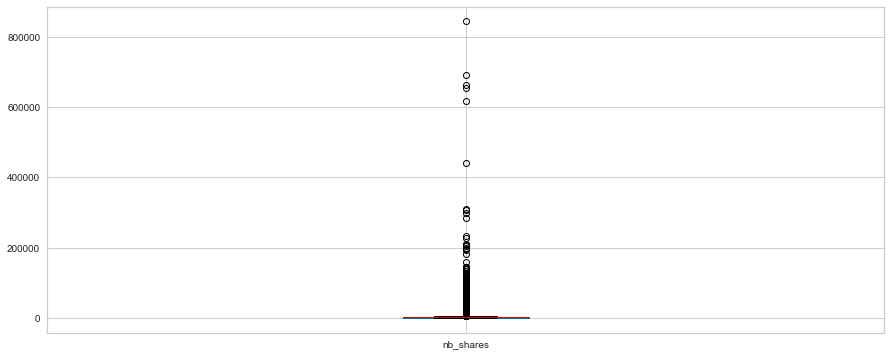

In [1106]:
plt.figure(figsize=(15,6))
df2.boxplot(column='nb_shares')

In [1107]:
q1=df2['nb_shares'].quantile(0.25)
q3=df2['nb_shares'].quantile(0.75)

cutoff=(q3-q1)*1.6
lbound=q1-cutoff
ubound=q3+cutoff
(lbound,ubound)

(-1863.0, 5508.0)

In [1108]:
df_no_outliers=df2[df2['nb_shares']<5509]

In [1109]:
df_no_outliers.shape

(34133, 24)

In [1110]:
df_no_outliers.describe()

,nb_words_title,nb_words_content,nb_links,nb_imgs,nb_videos,nb_keywords,cat_lifestyle,cat_entertainment,cat_business,cat_social_media,...,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,weekday_sunday,is_weekend,abs_title_subjectivity,abs_title_sentiment_polarity,nb_shares
count,34133.000000,34133.000000,34133.000000,34133.000000,34133.000000,34133.000000,34133.000000,34133.000000,34133.000000,34133.000000,...,34133.000000,34133.000000,34133.000000,34133.000000,34133.000000,34133.000000,34133.000000,34133.000000,34133.000000,34133.000000
mean,10.388158,562.330560,10.885214,4.352445,1.198781,7.191779,0.052266,0.180763,0.167814,0.057950,...,0.187473,0.188850,0.185305,0.144640,0.059825,0.066505,0.126329,0.342549,0.150977,1669.520142
std,2.107591,459.838036,10.772623,8.091100,4.012550,1.923601,0.222566,0.384828,0.373707,0.233652,...,0.390296,0.391395,0.388550,0.351743,0.237165,0.249166,0.332225,0.189028,0.221355,1100.717202
min,2.000000,21.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,9.000000,262.000000,5.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,903.000000
50%,10.000000,426.000000,8.000000,1.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1300.000000
75%,12.000000,727.000000,13.000000,3.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.250000,2100.000000
max,20.000000,7764.000000,187.000000,128.000000,75.000000,10.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,5500.000000


In [1438]:
df_no_outliers.weekday_sunday.value_counts()

0.0    31863
1.0     2270
Name: weekday_sunday, dtype: int64

In [1113]:
df_no_outliers.head()

,url,nb_words_title,nb_words_content,nb_links,nb_imgs,nb_videos,nb_keywords,cat_lifestyle,cat_entertainment,cat_business,...,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,weekday_sunday,is_weekend,abs_title_subjectivity,abs_title_sentiment_polarity,nb_shares
0,http://mashable.com/2013/01/07/amazon-instant-...,12.0,219.0,4.0,1.0,0.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,9.0,255.0,3.0,1.0,0.0,4.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,9.0,211.0,3.0,1.0,0.0,6.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,9.0,531.0,9.0,1.0,0.0,7.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,13.0,1072.0,19.0,20.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.136364,505


In [1429]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34133 entries, 0 to 34132
Data columns (total 24 columns):
url                             34133 non-null object
nb_words_title                  34133 non-null float64
nb_words_content                34133 non-null float64
nb_links                        34133 non-null float64
nb_imgs                         34133 non-null float64
nb_videos                       34133 non-null float64
nb_keywords                     34133 non-null float64
cat_lifestyle                   34133 non-null float64
cat_entertainment               34133 non-null float64
cat_business                    34133 non-null float64
cat_social_media                34133 non-null float64
cat_tech                        34133 non-null float64
cat_world                       34133 non-null float64
weekday_monday                  34133 non-null float64
weekday_tuesday                 34133 non-null float64
weekday_wednesday               34133 non-null float64
weekday_thur

### DF with outliers as dummies

In [1131]:
df_outliers_dummies=df2.copy()

In [1132]:
df_outliers_dummies['Outliers']=df_outliers_dummies['nb_shares'].apply(lambda x: 1 if x>5508 else 0)

In [1133]:
df_outliers_dummies['Outliers'].value_counts()

0    34133
1     4330
Name: Outliers, dtype: int64

In [1134]:
df_outliers_dummies.head()

,url,nb_words_title,nb_words_content,nb_links,nb_imgs,nb_videos,nb_keywords,cat_lifestyle,cat_entertainment,cat_business,...,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,weekday_sunday,is_weekend,abs_title_subjectivity,abs_title_sentiment_polarity,nb_shares,Outliers
0,http://mashable.com/2013/01/07/amazon-instant-...,12.0,219.0,4.0,1.0,0.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.187500,593,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,9.0,255.0,3.0,1.0,0.0,4.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,711,0
2,http://mashable.com/2013/01/07/apple-40-billio...,9.0,211.0,3.0,1.0,0.0,6.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,1500,0
3,http://mashable.com/2013/01/07/astronaut-notre...,9.0,531.0,9.0,1.0,0.0,7.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,1200,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,13.0,1072.0,19.0,20.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.136364,505,0


In [1135]:
df_outliers_dummies.reset_index(drop=True,inplace = True) 

In [1136]:
df_outliers_dummies

,url,nb_words_title,nb_words_content,nb_links,nb_imgs,nb_videos,nb_keywords,cat_lifestyle,cat_entertainment,cat_business,...,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,weekday_sunday,is_weekend,abs_title_subjectivity,abs_title_sentiment_polarity,nb_shares,Outliers
0,http://mashable.com/2013/01/07/amazon-instant-...,12.0,219.0,4.0,1.0,0.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.187500,593,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,9.0,255.0,3.0,1.0,0.0,4.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,711,0
2,http://mashable.com/2013/01/07/apple-40-billio...,9.0,211.0,3.0,1.0,0.0,6.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,1500,0
3,http://mashable.com/2013/01/07/astronaut-notre...,9.0,531.0,9.0,1.0,0.0,7.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,1200,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,13.0,1072.0,19.0,20.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.136364,505,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38458,http://mashable.com/2014/12/27/samsung-app-aut...,11.0,346.0,9.0,1.0,1.0,8.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.400000,0.000000,1800,0
38459,http://mashable.com/2014/12/27/seth-rogen-jame...,12.0,328.0,9.0,3.0,48.0,7.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.200000,1.000000,1900,0
38460,http://mashable.com/2014/12/27/son-pays-off-mo...,10.0,442.0,24.0,12.0,1.0,8.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.136364,1900,0
38461,http://mashable.com/2014/12/27/ukraine-blasts/,6.0,682.0,10.0,1.0,0.0,5.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,1100,0


## Descriptive statistics

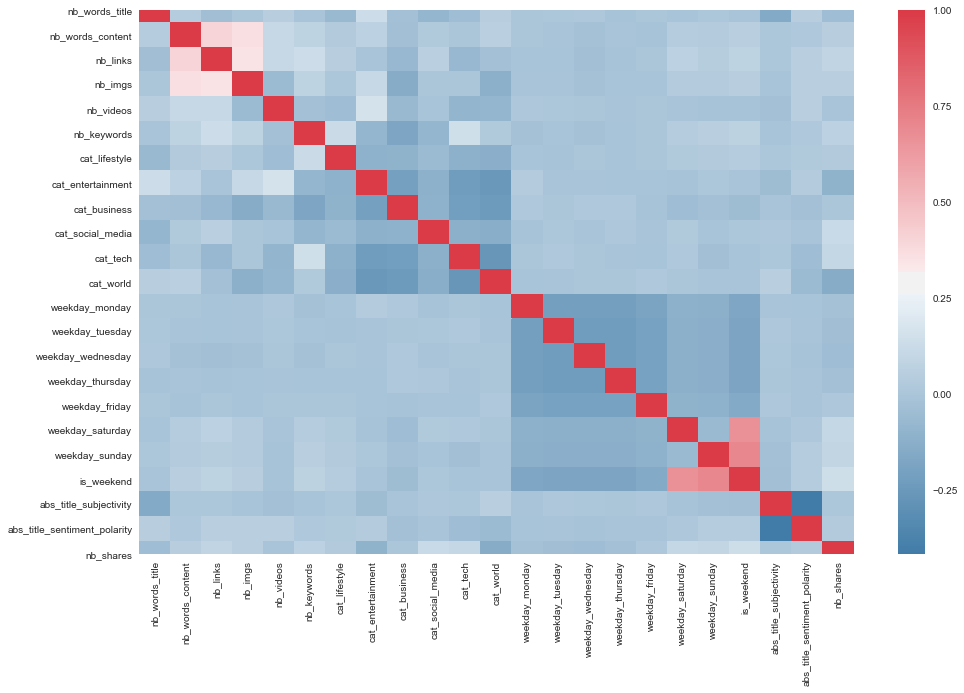

In [428]:
import seaborn as sns
plt.figure(figsize=(16, 10))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(df_no_outliers.corr(),cmap=cmap) 

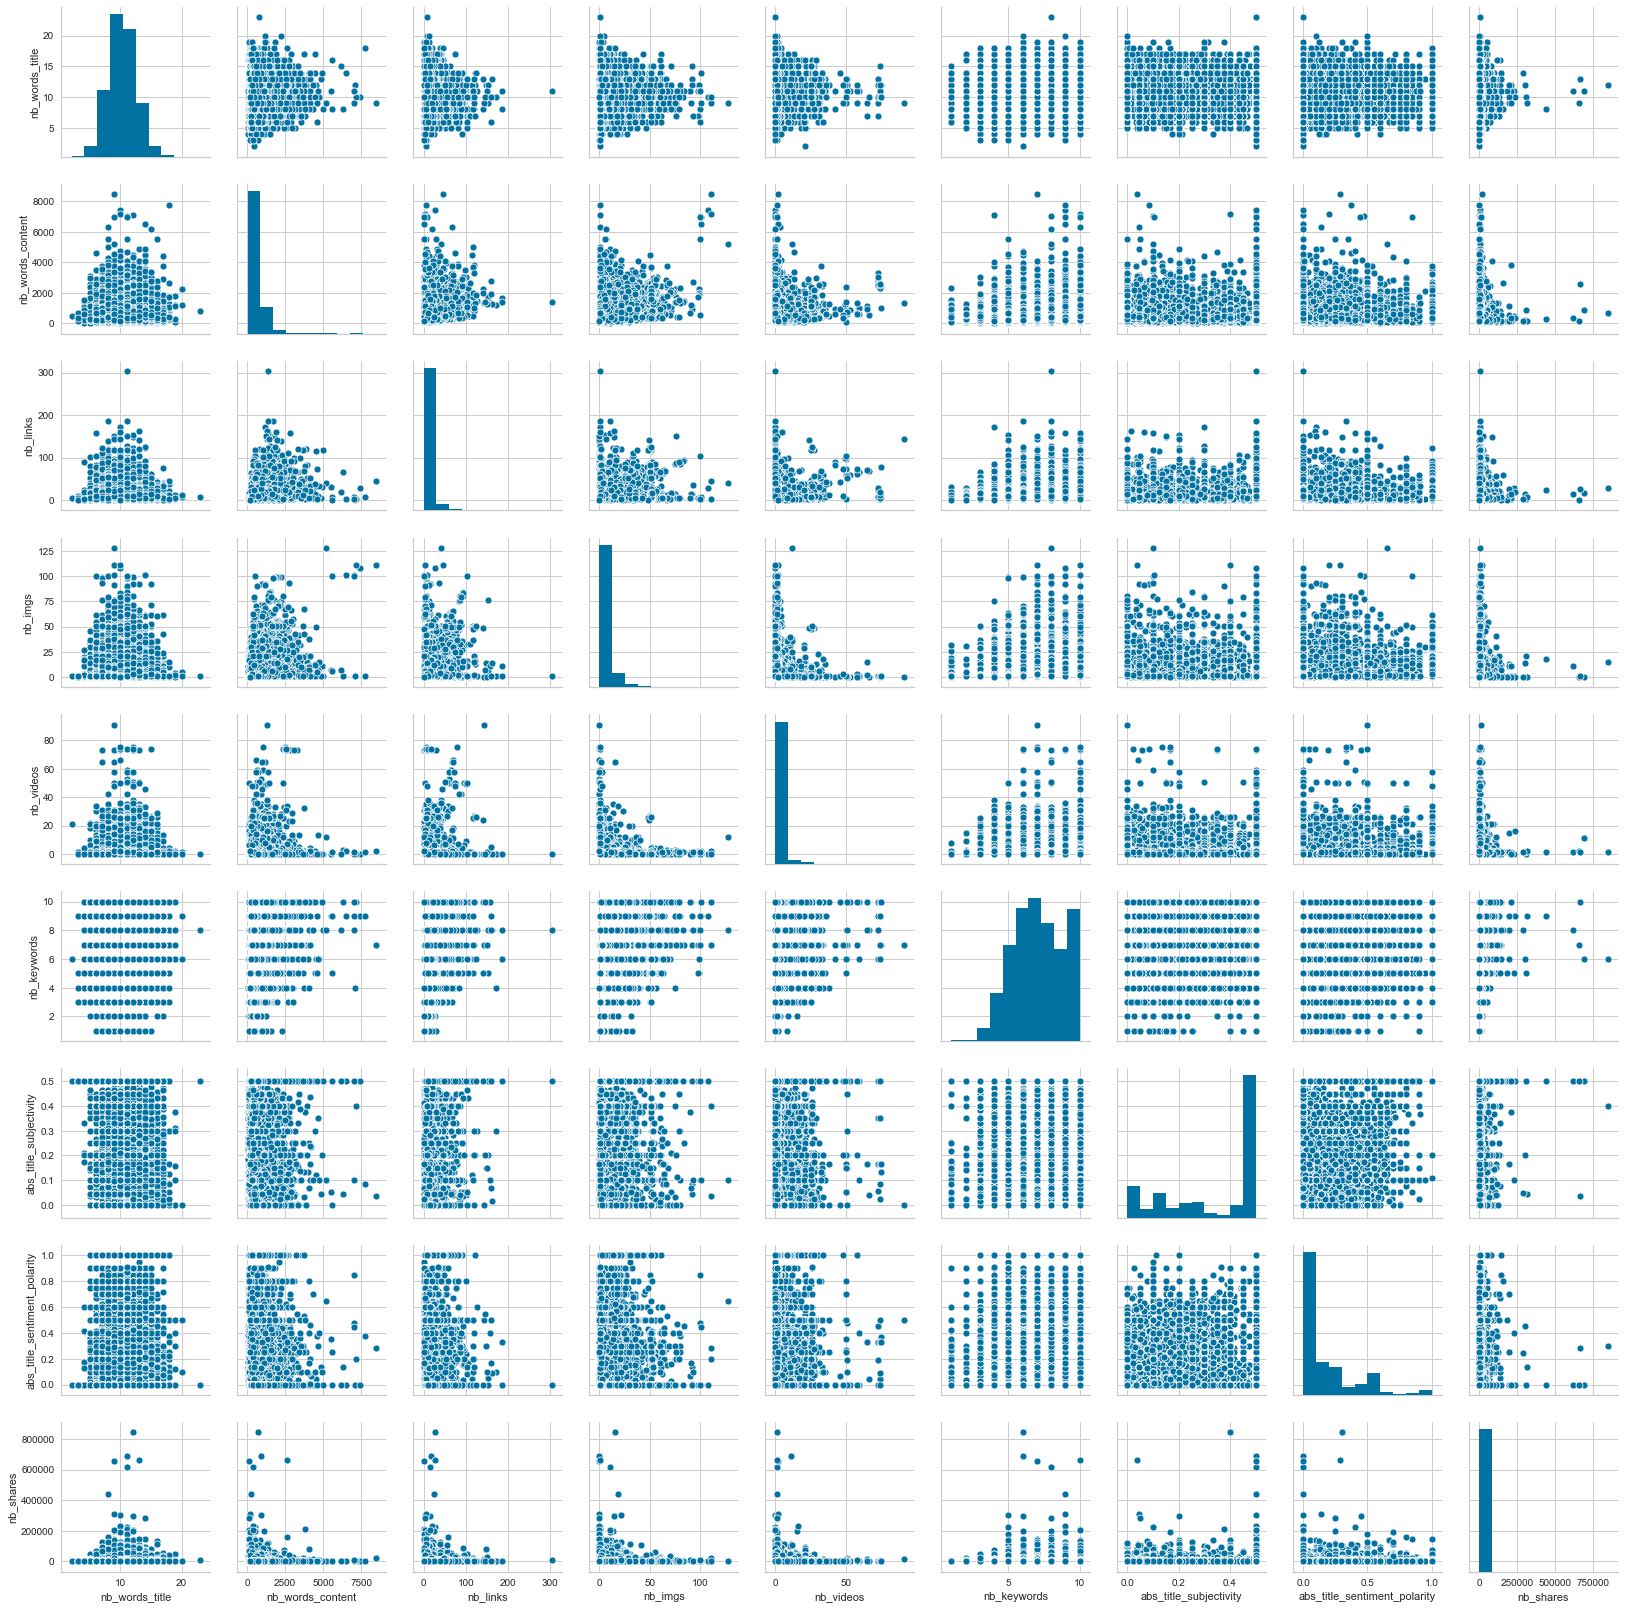

In [429]:
sns.pairplot(df2.drop(['cat_lifestyle','cat_entertainment','cat_business','cat_social_media','cat_tech','cat_world','weekday_monday','weekday_tuesday','weekday_wednesday','weekday_thursday','weekday_friday','weekday_saturday','weekday_sunday','is_weekend'],axis=1))



In [1424]:
df2.describe()

,nb_words_title,nb_words_content,nb_links,nb_imgs,nb_videos,nb_keywords,cat_lifestyle,cat_entertainment,cat_business,cat_social_media,...,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,weekday_sunday,is_weekend,abs_title_subjectivity,abs_title_sentiment_polarity,nb_shares
count,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,...,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000
mean,10.382419,563.295375,11.217872,4.563061,1.263786,7.215012,0.054000,0.178249,0.162104,0.060084,...,0.186439,0.187323,0.183345,0.143983,0.061592,0.069079,0.130671,0.342431,0.154930,3355.360398
std,2.113800,468.299538,11.340580,8.295365,4.164896,1.916459,0.226021,0.382727,0.368551,0.237645,...,0.389466,0.390176,0.386954,0.351077,0.240416,0.253592,0.337045,0.188606,0.225636,11585.968776
min,2.000000,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,9.000000,259.000000,5.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,945.000000
50%,10.000000,423.000000,8.000000,1.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,729.000000,14.000000,4.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.250000,2700.000000
max,23.000000,8474.000000,304.000000,128.000000,91.000000,10.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


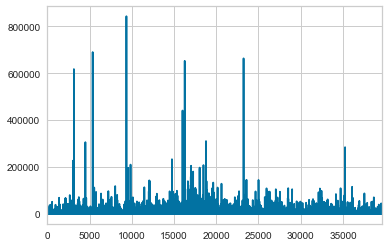

In [430]:
df2['nb_shares'].plot()

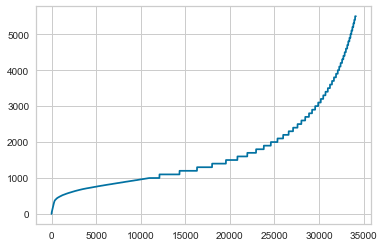

In [431]:
plt.plot(sorted(df_no_outliers['nb_shares']))
plt.show()

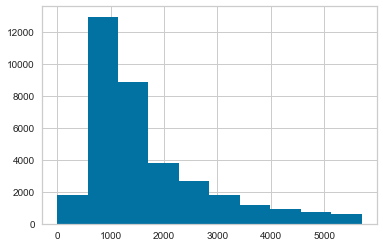

In [382]:
df_no_outliers['nb_shares'].hist() #not normally distributed

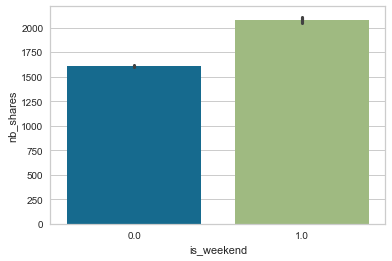

In [1445]:
sns.barplot(x='is_weekend', y='nb_shares', data=df_no_outliers)
#g.set_yscale('log') #pour les valeurs positives only
#g.set_yscale('symlog') #quand valeurs positives et négatives
#g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

## Data preprocessing

### Scaler - without outliers

In [433]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34133 entries, 0 to 39643
Data columns (total 24 columns):
url                             34133 non-null object
nb_words_title                  34133 non-null float64
nb_words_content                34133 non-null float64
nb_links                        34133 non-null float64
nb_imgs                         34133 non-null float64
nb_videos                       34133 non-null float64
nb_keywords                     34133 non-null float64
cat_lifestyle                   34133 non-null float64
cat_entertainment               34133 non-null float64
cat_business                    34133 non-null float64
cat_social_media                34133 non-null float64
cat_tech                        34133 non-null float64
cat_world                       34133 non-null float64
weekday_monday                  34133 non-null float64
weekday_tuesday                 34133 non-null float64
weekday_wednesday               34133 non-null float64
weekday_thur

In [435]:
from sklearn.preprocessing import StandardScaler

In [436]:
scaled_no_outliers = df_no_outliers.copy()
col_names = ['nb_words_title','nb_words_content','nb_links','nb_imgs','nb_videos','nb_keywords','abs_title_subjectivity','abs_title_sentiment_polarity','nb_shares']
features = scaled_no_outliers[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [437]:
scaled_no_outliers[col_names] = features

In [438]:
scaler.mean_

array([1.03881581e+01, 5.62330560e+02, 1.08852137e+01, 4.35244485e+00,
       1.19878124e+00, 7.19177922e+00, 3.42549082e-01, 1.50976526e-01,
       1.66952014e+03])

In [439]:
#print(scaled_no_outliers)

In [440]:
scaled_no_outliers=pd.DataFrame(scaled_no_outliers)


In [441]:
#scaled_no_outliers.drop('url',axis=1,inplace=True)

In [442]:
scaled_no_outliers.head()

,url,nb_words_title,nb_words_content,nb_links,nb_imgs,nb_videos,nb_keywords,cat_lifestyle,cat_entertainment,cat_business,...,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,weekday_sunday,is_weekend,abs_title_subjectivity,abs_title_sentiment_polarity,nb_shares
0,http://mashable.com/2013/01/07/amazon-instant-...,0.764790,-0.746645,-0.639149,-0.414343,-0.298762,-1.139431,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.812186,0.165002,-0.978031
1,http://mashable.com/2013/01/07/ap-samsung-spon...,-0.658656,-0.668355,-0.731979,-0.414343,-0.298762,-1.659297,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.832962,-0.682065,-0.870827
2,http://mashable.com/2013/01/07/apple-40-billio...,-0.658656,-0.764042,-0.731979,-0.414343,-0.298762,-0.619565,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.832962,-0.682065,-0.154011
3,http://mashable.com/2013/01/07/astronaut-notre...,-0.658656,-0.068135,-0.175003,-0.414343,-0.298762,-0.099699,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.832962,-0.682065,-0.426565
4,http://mashable.com/2013/01/07/att-u-verse-apps/,1.239273,1.108384,0.753290,1.933950,-0.298762,-0.099699,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.571718,-0.066016,-1.057980


### "Normalized" - without outliers

In [445]:
df_no_outliers.head()

,url,nb_words_title,nb_words_content,nb_links,nb_imgs,nb_videos,nb_keywords,cat_lifestyle,cat_entertainment,cat_business,...,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,weekday_sunday,is_weekend,abs_title_subjectivity,abs_title_sentiment_polarity,nb_shares
0,http://mashable.com/2013/01/07/amazon-instant-...,12.0,219.0,4.0,1.0,0.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,9.0,255.0,3.0,1.0,0.0,4.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,9.0,211.0,3.0,1.0,0.0,6.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,9.0,531.0,9.0,1.0,0.0,7.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,13.0,1072.0,19.0,20.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.136364,505


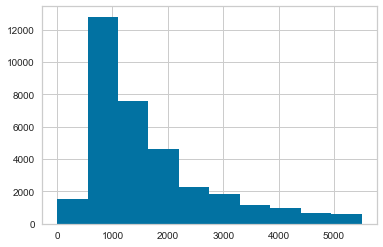

In [466]:
df_no_outliers['nb_shares'].hist()

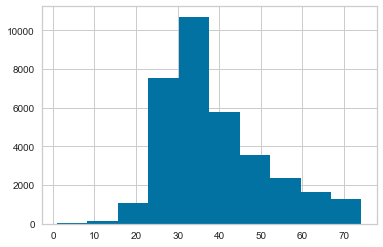

In [467]:
df_no_outliers['nb_shares'].apply(lambda x:x**0.5).hist()

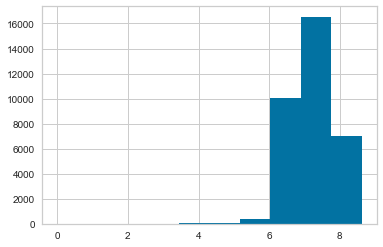

In [468]:
df_no_outliers['nb_shares'].apply(np.log).hist()

In [482]:
df_no_outliers_norma=df_no_outliers.copy()

In [483]:
df_no_outliers_norma['nb_words_content']=df_no_outliers_norma['nb_words_content'].apply(np.log)
df_no_outliers_norma['nb_links']=df_no_outliers_norma['nb_links'].apply(lambda x:x**0.5)
df_no_outliers_norma['nb_shares']=df_no_outliers_norma['nb_shares'].apply(lambda x:x**0.5)


In [568]:
df_no_outliers_norma.head()

,url,nb_words_title,nb_words_content,nb_links,nb_imgs,nb_videos,nb_keywords,cat_lifestyle,cat_entertainment,cat_business,...,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,weekday_sunday,is_weekend,abs_title_subjectivity,abs_title_sentiment_polarity,nb_shares
0,http://mashable.com/2013/01/07/amazon-instant-...,12.0,5.389072,2.000000,1.0,0.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.187500,24.351591
1,http://mashable.com/2013/01/07/ap-samsung-spon...,9.0,5.541264,1.732051,1.0,0.0,4.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,26.664583
2,http://mashable.com/2013/01/07/apple-40-billio...,9.0,5.351858,1.732051,1.0,0.0,6.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,38.729833
3,http://mashable.com/2013/01/07/astronaut-notre...,9.0,6.274762,3.000000,1.0,0.0,7.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,34.641016
4,http://mashable.com/2013/01/07/att-u-verse-apps/,13.0,6.977281,4.358899,20.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.136364,22.472205


In [485]:
df_no_outliers_norma.head()

,url,nb_words_title,nb_words_content,nb_links,nb_imgs,nb_videos,nb_keywords,cat_lifestyle,cat_entertainment,cat_business,...,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,weekday_sunday,is_weekend,abs_title_subjectivity,abs_title_sentiment_polarity,nb_shares
0,http://mashable.com/2013/01/07/amazon-instant-...,12.0,5.389072,2.000000,1.0,0.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.187500,24.351591
1,http://mashable.com/2013/01/07/ap-samsung-spon...,9.0,5.541264,1.732051,1.0,0.0,4.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,26.664583
2,http://mashable.com/2013/01/07/apple-40-billio...,9.0,5.351858,1.732051,1.0,0.0,6.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,38.729833
3,http://mashable.com/2013/01/07/astronaut-notre...,9.0,6.274762,3.000000,1.0,0.0,7.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,34.641016
4,http://mashable.com/2013/01/07/att-u-verse-apps/,13.0,6.977281,4.358899,20.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.136364,22.472205


### Scaler with outliers as dummies

In [492]:
scaled_ok_outliers.head()

,url,nb_words_title,nb_words_content,nb_links,nb_imgs,nb_videos,nb_keywords,cat_lifestyle,cat_entertainment,cat_business,...,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,weekday_sunday,is_weekend,abs_title_subjectivity,abs_title_sentiment_polarity,nb_shares,Outliers
0,http://mashable.com/2013/01/07/amazon-instant-...,12.0,219.0,4.0,1.0,0.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.187500,593,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,9.0,255.0,3.0,1.0,0.0,4.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,711,0
2,http://mashable.com/2013/01/07/apple-40-billio...,9.0,211.0,3.0,1.0,0.0,6.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,1500,0
3,http://mashable.com/2013/01/07/astronaut-notre...,9.0,531.0,9.0,1.0,0.0,7.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,1200,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,13.0,1072.0,19.0,20.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.136364,505,0


In [493]:
scaled_ok_outliers = df_outliers_dummies.copy()
features2 = scaled_ok_outliers[col_names]
scaler2 = StandardScaler().fit(features2.values)
features2 = scaler2.transform(features2.values)

In [494]:
scaled_ok_outliers[col_names] = features2

In [495]:
scaler2.mean_

array([1.03824195e+01, 5.63295375e+02, 1.12178717e+01, 4.56306060e+00,
       1.26378598e+00, 7.21501183e+00, 3.42431411e-01, 1.54929513e-01,
       3.35536040e+03])

In [496]:
scaled_ok_outliers=pd.DataFrame(scaled_ok_outliers)

In [219]:
#scaled_ok_outliers.drop('url',axis=1,inplace=True)

### "Normalized with outliers"

In [501]:
df_outliers_dummies.head()

,url,nb_words_title,nb_words_content,nb_links,nb_imgs,nb_videos,nb_keywords,cat_lifestyle,cat_entertainment,cat_business,...,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,weekday_sunday,is_weekend,abs_title_subjectivity,abs_title_sentiment_polarity,nb_shares,Outliers
0,http://mashable.com/2013/01/07/amazon-instant-...,12.0,219.0,4.0,1.0,0.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.187500,593,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,9.0,255.0,3.0,1.0,0.0,4.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,711,0
2,http://mashable.com/2013/01/07/apple-40-billio...,9.0,211.0,3.0,1.0,0.0,6.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,1500,0
3,http://mashable.com/2013/01/07/astronaut-notre...,9.0,531.0,9.0,1.0,0.0,7.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,1200,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,13.0,1072.0,19.0,20.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.136364,505,0


In [502]:
df_outliers_dummies.Outliers.value_counts()

0    34133
1     4330
Name: Outliers, dtype: int64

In [503]:
df_ok_outliers_norma=df_outliers_dummies.copy()

In [504]:
df_ok_outliers_norma['nb_words_content']=df_ok_outliers_norma['nb_words_content'].apply(np.log)
df_ok_outliers_norma['nb_links']=df_ok_outliers_norma['nb_links'].apply(lambda x:x**0.5)
df_ok_outliers_norma['nb_shares']=df_ok_outliers_norma['nb_shares'].apply(lambda x:x**0.5)

In [505]:
df_ok_outliers_norma.head()

,url,nb_words_title,nb_words_content,nb_links,nb_imgs,nb_videos,nb_keywords,cat_lifestyle,cat_entertainment,cat_business,...,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,weekday_sunday,is_weekend,abs_title_subjectivity,abs_title_sentiment_polarity,nb_shares,Outliers
0,http://mashable.com/2013/01/07/amazon-instant-...,12.0,5.389072,2.000000,1.0,0.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.187500,24.351591,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,9.0,5.541264,1.732051,1.0,0.0,4.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,26.664583,0
2,http://mashable.com/2013/01/07/apple-40-billio...,9.0,5.351858,1.732051,1.0,0.0,6.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,38.729833,0
3,http://mashable.com/2013/01/07/astronaut-notre...,9.0,6.274762,3.000000,1.0,0.0,7.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,34.641016,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,13.0,6.977281,4.358899,20.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.136364,22.472205,0


## Unsupervised Learning

In [506]:
from sklearn.cluster import KMeans, MiniBatchKMeans #mini take samples then take avg with lower complexity
from sklearn.decomposition import PCA
import matplotlib.image as mpimg
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn import metrics
from time import time

### PCA + Kmeans

In [1309]:
from sklearn.decomposition import PCA

In [1310]:
#### With outliers - normalized data

In [1311]:
pca=PCA(2)

In [1312]:
pca.fit(df_ok_outliers_norma.drop('url',axis=1))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [1313]:
pca.explained_variance_ratio_[:8]  #proportion of dataset per column

array([0.91737843, 0.0580029 ])

In [1314]:
pca.explained_variance_ratio_[:8].sum()  

0.975381333645409

In [1316]:
#pca_df_no_outliers=pd.DataFrame(pca.transform(scaled_no_outliers.drop('url',axis=1)),columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8'])

pca_df_ok_outliers=pd.DataFrame(pca.transform(df_ok_outliers_norma.drop('url',axis=1)),columns=['pca1','pca2'])




In [1317]:
pca_df_ok_outliers

,pca1,pca2
0,-23.371870,-3.103454
1,-21.061825,-3.190392
2,-8.994257,-3.418311
3,-13.074183,-3.202906
4,-24.820364,16.078557
...,...,...
38458,-5.283988,-3.419977
38459,-3.857540,-3.640136
38460,-3.873427,7.630756
38461,-14.553262,-3.200542


In [1318]:
from sklearn.cluster import KMeans

In [1380]:
kmeans=KMeans(2)

In [1381]:
df_clusters_ok_outliers=kmeans.fit(pca_df_ok_outliers)

In [1382]:
df_clusters_ok_outliers.cluster_centers_

array([[ 8.14079680e+01,  1.18649785e-01],
       [-7.40009466e+00, -1.07854263e-02]])

In [1383]:
#df_no_outliers.drop('clusters',axis=1,inplace=True)

In [1384]:
test_ok_outliers=df_outliers_dummies.copy()
#test_no_outliers_norma=df_no_outliers_norma.copy()

In [1385]:
test_ok_outliers['clusters_pca_kmeans']=df_clusters_ok_outliers.fit_predict(pca_df_ok_outliers)

In [1386]:
test_ok_outliers['clusters_pca_kmeans'].value_counts()

0    35259
1     3204
Name: clusters_pca_kmeans, dtype: int64

In [1387]:
#test_no_outliers.info()

In [1388]:
np.unique(kmeans.labels_).shape[0]

2

In [1389]:
pd.crosstab(test_ok_outliers['is_weekend'],test_ok_outliers['clusters_pca_kmeans'])

clusters_pca_kmeans,0,1
is_weekend,,
0.0,30746,2691
1.0,4513,513


In [1390]:
pd.crosstab(test_ok_outliers['nb_shares'],test_ok_outliers['clusters_pca_kmeans'])

clusters_pca_kmeans,0,1
nb_shares,,
1,1,0
5,1,0
8,1,0
22,2,0
23,1,0
...,...,...
617900,0,1
652900,0,1
663600,0,1


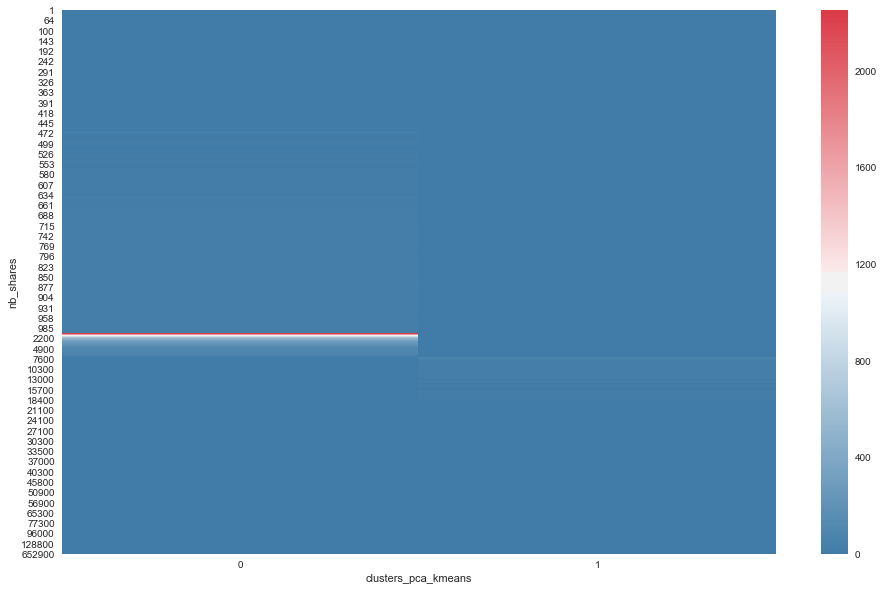

In [1391]:
plt.figure(figsize=(16, 10))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(pd.crosstab(test_ok_outliers['nb_shares'],test_ok_outliers['clusters_pca_kmeans']),cmap=cmap)

#plt.figure(figsize=(16, 10))
#cmap = sns.diverging_palette(240, 10, as_cmap=True)
#sns.heatmap(df_no_outliers.corr(),cmap=cmap) 

In [1392]:
metrics.silhouette_score(test_ok_outliers.drop('url',axis=1),kmeans.labels_)

0.829336039966811

Text(0, 0.5, 'abs_title_subjectivity')

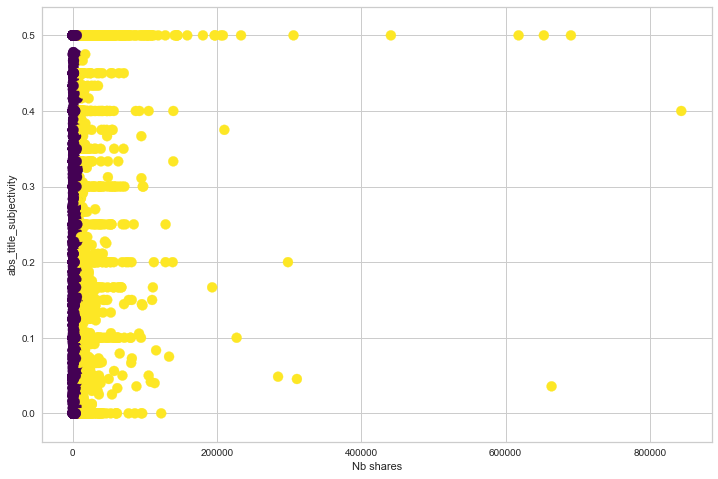

In [1439]:
plt.figure(figsize=(12,8))
plt.scatter(test_ok_outliers['nb_shares'],test_ok_outliers['abs_title_subjectivity'],c=kmeans.labels_,cmap='viridis',s=100) 
plt.xlabel('Nb shares')
plt.ylabel('abs_title_subjectivity')

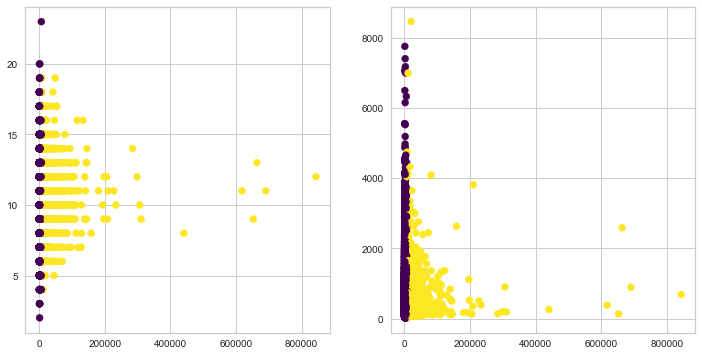

In [1394]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(test_ok_outliers['nb_shares'],test_ok_outliers['nb_words_title'],c=kmeans.labels_,cmap='viridis',s=50)

ax[1].scatter(test_ok_outliers['nb_shares'],test_ok_outliers['nb_words_content'],c=kmeans.labels_,cmap='viridis',s=50)


In [1395]:
test_ok_outliers.clusters_pca_kmeans.value_counts()

0    35259
1     3204
Name: clusters_pca_kmeans, dtype: int64

### Kmeans

In [1252]:
from yellowbrick.cluster import KElbowVisualizer

In [1253]:
kmeans=KMeans(3)

In [1254]:
#df_no_outliers.isna().sum()

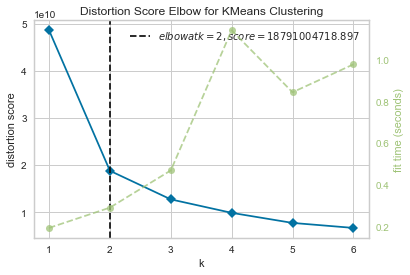

In [1255]:
viz=KElbowVisualizer(kmeans,k=(1,7))
num_cols=df_no_outliers.drop('url',axis=1)
viz.fit(num_cols)
viz.poof()

In [1256]:
inertia=[]

for k in range(1,7):
    kmeans=KMeans(n_clusters=k,random_state=1).fit(num_cols) #random_state equals to any mumber the centroid initially will remain they won't change places when creating new clusters, when came compare each others
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, 'inertia')

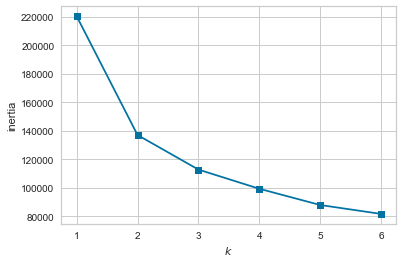

In [1257]:
plt.plot(range(1,7),inertia,marker='s')
plt.xlabel('$k$') #$ signs to make it italic
plt.ylabel('inertia')

In [301]:
?KMeans

In [1258]:
kmeans=KMeans(n_clusters=2,random_state=1)
kmeans.fit(num_cols)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

Text(0, 0.5, 'abs_title_subjectivity')

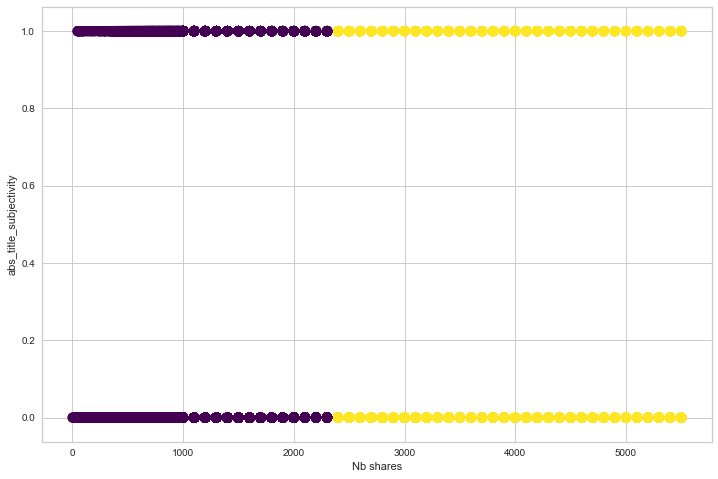

In [1264]:
plt.figure(figsize=(12,8))
plt.scatter(df_no_outliers['nb_shares'],df_no_outliers['cat_entertainment'],c=kmeans.labels_,cmap='viridis',s=100) 
plt.xlabel('Nb shares')
plt.ylabel('abs_title_subjectivity')

In [835]:
from sklearn import metrics
metrics.silhouette_score(df_no_outliers.drop('url',axis=1),kmeans.labels_)

0.6166271450362248

In [ ]:
# kmeans 

In [1266]:
kmeans=KMeans()

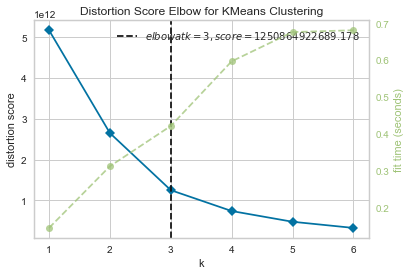

In [1267]:
viz=KElbowVisualizer(kmeans,k=(1,7))
num_cols=df_outliers_dummies.drop('url',axis=1)
viz.fit(num_cols)
viz.poof()

In [1268]:
kmeans=KMeans(n_clusters=3,random_state=1)
kmeans.fit(num_cols)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

Text(0, 0.5, 'abs_title_subjectivity')

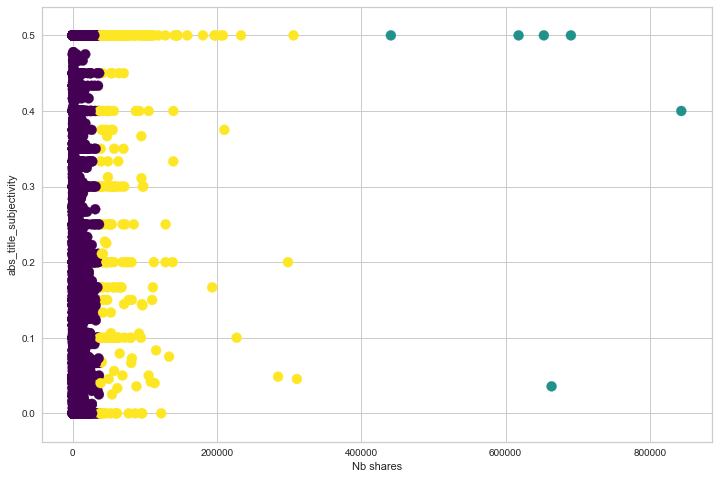

In [1269]:
plt.figure(figsize=(12,8))
plt.scatter(df_outliers_dummies['nb_shares'],df_outliers_dummies['abs_title_subjectivity'],c=kmeans.labels_,cmap='viridis',s=100) 
plt.xlabel('Nb shares')
plt.ylabel('abs_title_subjectivity')

In [1270]:
metrics.silhouette_score(df_outliers_dummies.drop('url',axis=1),kmeans.labels_)

0.9479983390825061

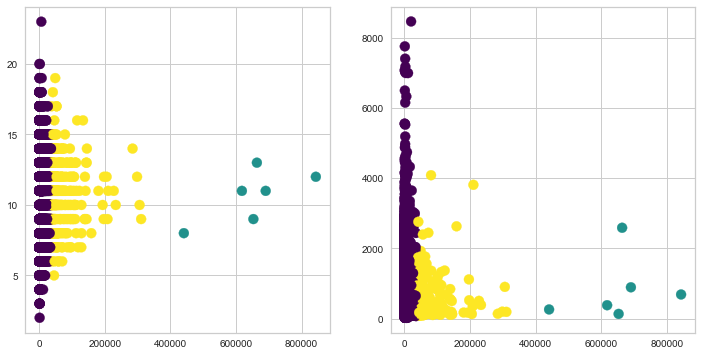

In [1271]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(df_outliers_dummies['nb_shares'],df_outliers_dummies['nb_words_title'],c=kmeans.labels_,cmap='viridis',s=100)

ax[1].scatter(df_outliers_dummies['nb_shares'],df_outliers_dummies['nb_words_content'],c=kmeans.labels_,cmap='viridis',s=100)


In [1149]:
unsup_ml=df_outliers_dummies.copy()

In [1151]:
unsup_ml.reset_index(inplace=True)

In [1153]:
unsup_ml.drop('index',axis=1,inplace=True)

In [1155]:
unsup_ml.shape

(38463, 25)

In [1156]:
t=pd.DataFrame(kmeans.labels_)

In [1157]:
t[0].value_counts()

0    38157
2      300
1        6
Name: 0, dtype: int64

In [1158]:
unsup_ml['clusters']=t[0]

In [1159]:
unsup_ml['clusters'].value_counts()

0    38157
2      300
1        6
Name: clusters, dtype: int64

In [1163]:
unsup_ml.head()

,url,nb_words_title,nb_words_content,nb_links,nb_imgs,nb_videos,nb_keywords,cat_lifestyle,cat_entertainment,cat_business,...,weekday_thursday,weekday_friday,weekday_saturday,weekday_sunday,is_weekend,abs_title_subjectivity,abs_title_sentiment_polarity,nb_shares,Outliers,clusters
0,http://mashable.com/2013/01/07/amazon-instant-...,12.0,219.0,4.0,1.0,0.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.187500,593,0,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,9.0,255.0,3.0,1.0,0.0,4.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,711,0,0
2,http://mashable.com/2013/01/07/apple-40-billio...,9.0,211.0,3.0,1.0,0.0,6.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,1500,0,0
3,http://mashable.com/2013/01/07/astronaut-notre...,9.0,531.0,9.0,1.0,0.0,7.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,1200,0,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,13.0,1072.0,19.0,20.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.045455,0.136364,505,0,0


In [ ]:
#adding clusters to the "normalized df with outilers as dummies"

In [1282]:
unsup_ml_normalized=df_ok_outliers_norma.copy()

In [1284]:
unsup_ml_normalized.reset_index(inplace=True)

In [1285]:
unsup_ml_normalized.drop('index',axis=1,inplace=True)

In [1288]:
unsup_ml_normalized['clusters']=t[0]

In [1290]:
unsup_ml_normalized['clusters'].value_counts()

0    38157
2      300
1        6
Name: clusters, dtype: int64

### With DBSCAN

In [1272]:
from sklearn.cluster import DBSCAN

In [1280]:
X=scaled_no_outliers.drop('url',axis=1)
clustering = DBSCAN(eps=0.5, min_samples=10).fit(X)

In [1281]:
np.unique(clustering.labels_).shape[0]

18

In [1275]:
metrics.silhouette_score(X,clustering.labels_)

-0.24904019390589563

Text(0, 0.5, 'nb_words_title')

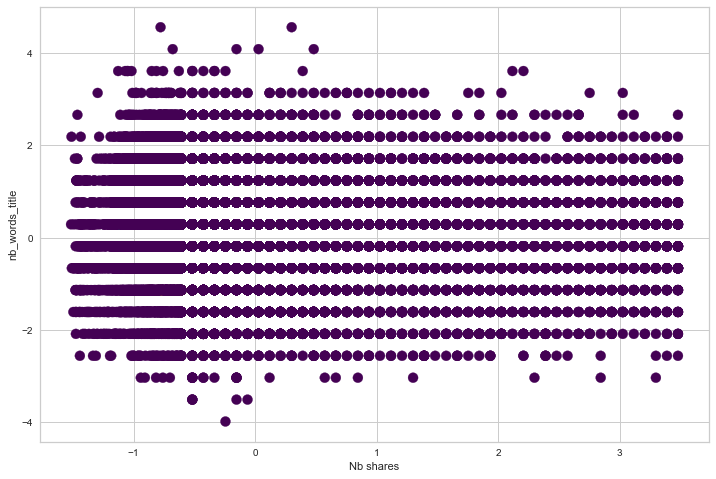

In [1277]:
plt.figure(figsize=(12,8))
plt.scatter(scaled_no_outliers['nb_shares'],scaled_no_outliers['nb_words_title'],c=clustering.labels_,cmap='viridis',s=100) 
plt.xlabel('Nb shares')
plt.ylabel('nb_words_title')


## Supervised Learning - Classification model

In [1412]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [1292]:
sl_df=unsup_ml_normalized.copy()

In [1396]:
y=test_ok_outliers['clusters_pca_kmeans']

In [1397]:
X=test_ok_outliers.drop(['url'],axis=1)

In [1398]:
X.shape

(38463, 25)

In [1399]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Naïve Bayes

In [1401]:
model=GaussianNB()

In [1402]:
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [1403]:
y_model=model.predict(X_test)

In [1404]:
accuracy_score(y_test,y_model)

0.988560533841754

In [1405]:
mat=confusion_matrix(y_test,y_model)
mat

array([[10421,   132],
       [    0,   986]])

### Logistic Regression

In [1406]:
from sklearn.linear_model import LogisticRegression

In [1407]:
model2=LogisticRegression(multi_class='multinomial',solver='newton-cg')

In [1408]:
model2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [1409]:
y_hat2=model2.predict(X_test)

In [1410]:
accuracy_score(y_test,y_hat2)

1.0

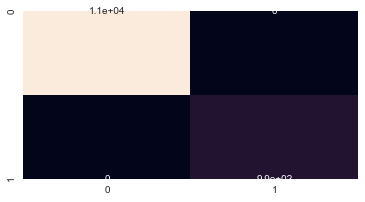

In [1411]:
mat=confusion_matrix(y_test,y_hat2)
sns.heatmap(mat,square=True,annot=True,cbar=False)
plt.show()

### Decision Tree

In [1413]:
model3=DecisionTreeClassifier().fit(X_train,y_train)
y_pred_3=model3.predict(X_test)
metrics.confusion_matrix(y_test,y_pred_3)

array([[10553,     0],
       [    0,   986]])

In [1418]:
y_pred_proba=model3.predict_proba(X_test)[::,1]

In [1423]:
accuracy_score(y_test,y_pred_proba)

1.0

1.0


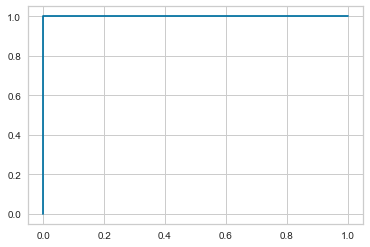

In [1419]:
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr)
print(auc)

In [1420]:
model_list=[LogisticRegression(),RandomForestClassifier(),GaussianNB(),KNeighborsClassifier(),DecisionTreeClassifier(),XGBClassifier()]

In [1421]:
l_acc=[]
l_cm=[]
for model in model_list:
    model2=model.fit(X=X_train,y=y_train)
    y_pred_2=model2.predict(X_test)
    l_acc.append(metrics.accuracy_score(y_test,y_pred_2))
    l_cm.append(metrics.confusion_matrix(y_test,y_pred_2))

In [1422]:
pd.DataFrame([model_list,l_acc]).T.sort_values(by=1)

,0,1
2,"GaussianNB(priors=None, var_smoothing=1e-09)",0.988561
3,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.999827
0,"LogisticRegression(C=1.0, class_weight=None, d...",1
1,"(DecisionTreeClassifier(class_weight=None, cri...",1
4,"DecisionTreeClassifier(class_weight=None, crit...",1
5,"XGBClassifier(base_score=0.5, booster='gbtree'...",1
